#Sentiment Analysis

# problem description
sentiment analysis is about knowing the polarity of word.
here we will implement a proramme using labelled data to predict the sentiments on new supplied text.

# implementation

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
  raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
  raw_data.append(movie_reviews.raw(fileids_neg[i]))

# The corresponding labels for the reviews, 0 for postive, 1 for negative
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)

# Split the training and testing set by 80-20%
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
# Calculate the tf-idf features from the training set
tfidf = TfidfVectorizer(use_idf=True)
tfidf_data = tfidf.fit_transform(X_train)
print(tfidf_data.shape)

# Train the naive Bayes model for prediction
classifier = MultinomialNB().fit(tfidf_data, Y_train)

(1600, 36151)


In [ ]:
# Performance on the testing set
testing_tfidf = tfidf.transform(X_test)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

              precision    recall  f1-score   support

         pos       0.83      0.81      0.82       198
         neg       0.82      0.84      0.83       202

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [ ]:
print(X_train[0])
print(testing_tfidf[0])

 ( note : there are spoilers regarding the film's climax ; the election , of course ) 
we see matthew broderick , a man torn to a primal state ; he's been unfaithful to his wife , lied to and manipulated his students , and by the same token they've demeaned his masculinity , his self-respect , his desperate attempt at changing the world . 
and yet , he equates the cause of his pain , his torment , with tracy flick ( reese witherspoon ) . 
no matter how many students have come and gone , and disappointed him as an educator , she's the real threat . 
about to give in , and divulge that she's won by only a lone vote , broderick's mccalister turns in defeat , sees tracy's euphoric celebration in the outside corridor and says , 'no' . 
the fact that he simultaneously lusts after her ideologically further illustrates that freudian foundation of entitlement which all men , no matter how obscure , have in their relationships ; a traditional expectation of success , to usurp and surpass women a

(-1.0, 1.0)

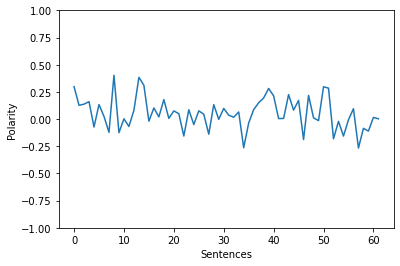

In [ ]:
# Evaluate the sentiment for each sentence in a review, and plot the variation of sentiment
import matplotlib.pyplot as plt

sentences = X_test[0].split('.')

testing_tfidf = tfidf.transform(sentences)
predictions = classifier.predict_proba(testing_tfidf)
polarity = [x[0] - x[1] for x in predictions]
# polarity = [x[0] if (x[0] > x[1]) else -x[1] for x in predictions]

plt.xlabel('Sentences')
plt.ylabel('Polarity')
plt.plot(polarity)
plt.ylim(-1, 1)

#discussion

to train a proper model we need corpus. technically corpus is labelled data, where expert has given us already defined text with its polarity. 
corpus here is provided by our nltk package. we are using movie review data as our base .  The same data we train our model using function:- MultinomialNB()

once we train, we need to test the accuray, for our model accuracy is coming as:- 0.82.

* f1 score is most important score to look for in a model matrix.

on a trained model, we pass new data using the function 

 predictions = classifier.predict(testing_tfidf)

before passing text to model, text  need to be converted into tf-idf word vectors. 





